In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

In [2]:
# Área de trabalho do projeto
drive.mount('/content/drive')
workspace_path = '/content/drive/MyDrive/Workspace'

Mounted at /content/drive


In [3]:
# Caminho para os arquivos dos dados
data_path = f'{workspace_path}/fiap/pos-tech/data-analytics/fase-4'
data_path += '/deploy-de-aplicacoes/dados'

In [4]:
cadastrados = pd.read_csv(f'{data_path}/clientes-cadastrados.csv.tar.gz')
cadastrados.head()

,ID_Cliente,Genero,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_celular,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,-21474,-1134,1,0,0,0,Segurança,2.0
3,5008808,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0
4,5008809,F,N,Y,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,-19110,-3051,1,0,1,1,Vendas,1.0


In [5]:
cadastrados.shape

(438557, 18)

In [6]:
cadastrados['ID_Cliente'].value_counts()

,count
ID_Cliente,
7137299,2
7702238,2
7282535,2
7243768,2
7050948,2
...,...
5690727,1
6621262,1
6621261,1


In [7]:
id_repetidos = cadastrados[cadastrados['ID_Cliente'].duplicated(keep=False)]

In [8]:
df_cadastrados_limpo = cadastrados.drop(id_repetidos.index).copy()

In [9]:
df_cadastrados_limpo['ID_Cliente'].value_counts()

,count
ID_Cliente,
5008804,1
6147691,1
6147689,1
6147688,1
6147685,1
...,...
6093492,1
5690720,1
6538938,1


In [10]:
df_cadastrados_limpo.isna().sum()

,0
ID_Cliente,0
Genero,0
Tem_carro,0
Tem_casa_propria,0
Qtd_filhos,0
Rendimento_anual,0
Categoria_de_renda,0
Grau_escolaridade,0
Estado_civil,0
Moradia,0


In [11]:
df_cadastrados_limpo['Ocupacao'].unique()

array([nan, 'Segurança', 'Vendas', 'Contabilidade', 'Construção Civil',
       'Gerência', 'Motorista', 'Equipe principal', 'Alta tecnologia',
       'Limpeza', 'Serviço privado', 'Cozinha', 'Baixa qualificação',
       'Medicina', 'Secretariado', 'Garçom', 'RH', 'Corretor imobiliário',
       'TI'], dtype=object)

In [12]:
df_cadastrados_limpo.fillna({'Ocupacao': 'Outro'}, inplace=True)

In [13]:
df_cadastrados_limpo.isna().sum()

,0
ID_Cliente,0
Genero,0
Tem_carro,0
Tem_casa_propria,0
Qtd_filhos,0
Rendimento_anual,0
Categoria_de_renda,0
Grau_escolaridade,0
Estado_civil,0
Moradia,0


In [14]:
df_cadastrados_limpo.nunique()

,0
ID_Cliente,438463
Genero,2
Tem_carro,2
Tem_casa_propria,2
Qtd_filhos,12
Rendimento_anual,866
Categoria_de_renda,5
Grau_escolaridade,5
Estado_civil,5
Moradia,6


In [15]:
df_cadastrados_limpo.drop('Genero', axis=1, inplace=True)

In [16]:
df_cadastrados_limpo.drop('Tem_celular', axis=1, inplace=True)

In [17]:
df_cadastrados_limpo['Tem_carro'].unique()

array(['Y', 'N'], dtype=object)

In [18]:
df_cadastrados_limpo['Tem_casa_propria'].unique()

array(['Y', 'N'], dtype=object)

In [19]:
df_cadastrados_limpo['Tem_telefone_trabalho'].unique()

array([1, 0])

In [20]:
df_cadastrados_limpo['Tem_telefone_fixo'].unique()

array([0, 1])

In [21]:
df_cadastrados_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 438463 entries, 0 to 438556
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID_Cliente             438463 non-null  int64  
 1   Tem_carro              438463 non-null  object 
 2   Tem_casa_propria       438463 non-null  object 
 3   Qtd_filhos             438463 non-null  int64  
 4   Rendimento_anual       438463 non-null  float64
 5   Categoria_de_renda     438463 non-null  object 
 6   Grau_escolaridade      438463 non-null  object 
 7   Estado_civil           438463 non-null  object 
 8   Moradia                438463 non-null  object 
 9   Idade                  438463 non-null  int64  
 10  Anos_empregado         438463 non-null  int64  
 11  Tem_telefone_trabalho  438463 non-null  int64  
 12  Tem_telefone_fixo      438463 non-null  int64  
 13  Tem_email              438463 non-null  int64  
 14  Ocupacao               438463 non-null  o

In [22]:
df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace({'Y': 1, 'N': 0})

<ipython-input-22-672ff44311d6>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cadastrados_limpo['Tem_carro'] = df_cadastrados_limpo['Tem_carro'].replace({'Y': 1, 'N': 0})


In [23]:
df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace({'Y': 1, 'N': 0})

<ipython-input-23-7697b9e2a360>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cadastrados_limpo['Tem_casa_propria'] = df_cadastrados_limpo['Tem_casa_propria'].replace({'Y': 1, 'N': 0})


In [24]:
df_cadastrados_limpo['Idade'] = - df_cadastrados_limpo['Idade'] / 354.2425

In [25]:
df_cadastrados_limpo['Anos_empregado'] = - df_cadastrados_limpo['Anos_empregado'] / 354.2425

In [26]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Qtd_filhos,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,33.889214,12.821725,1,0,0,Outro,2.0
1,5008805,1,1,0,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,33.889214,12.821725,1,0,0,Outro,2.0
2,5008806,1,1,0,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,60.619491,3.201197,0,0,0,Segurança,2.0
3,5008808,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,53.946096,8.612744,0,1,1,Vendas,1.0
4,5008809,0,1,0,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,53.946096,8.612744,0,1,1,Vendas,1.0


In [27]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

,count
Anos_empregado,
-1031.053586,75314
0.615398,262
4.736868,251
0.702908,241
2.760821,240
...,...
38.191352,1
28.858762,1
25.172022,1


In [28]:
df_cadastrados_limpo.loc[df_cadastrados_limpo['Anos_empregado'] < 0 , 'Anos_empregado'] = 0

In [29]:
df_cadastrados_limpo['Anos_empregado'].value_counts()

,count
Anos_empregado,
0.000000,75314
0.615398,262
4.736868,251
0.702908,241
2.760821,240
...,...
38.191352,1
28.858762,1
25.172022,1


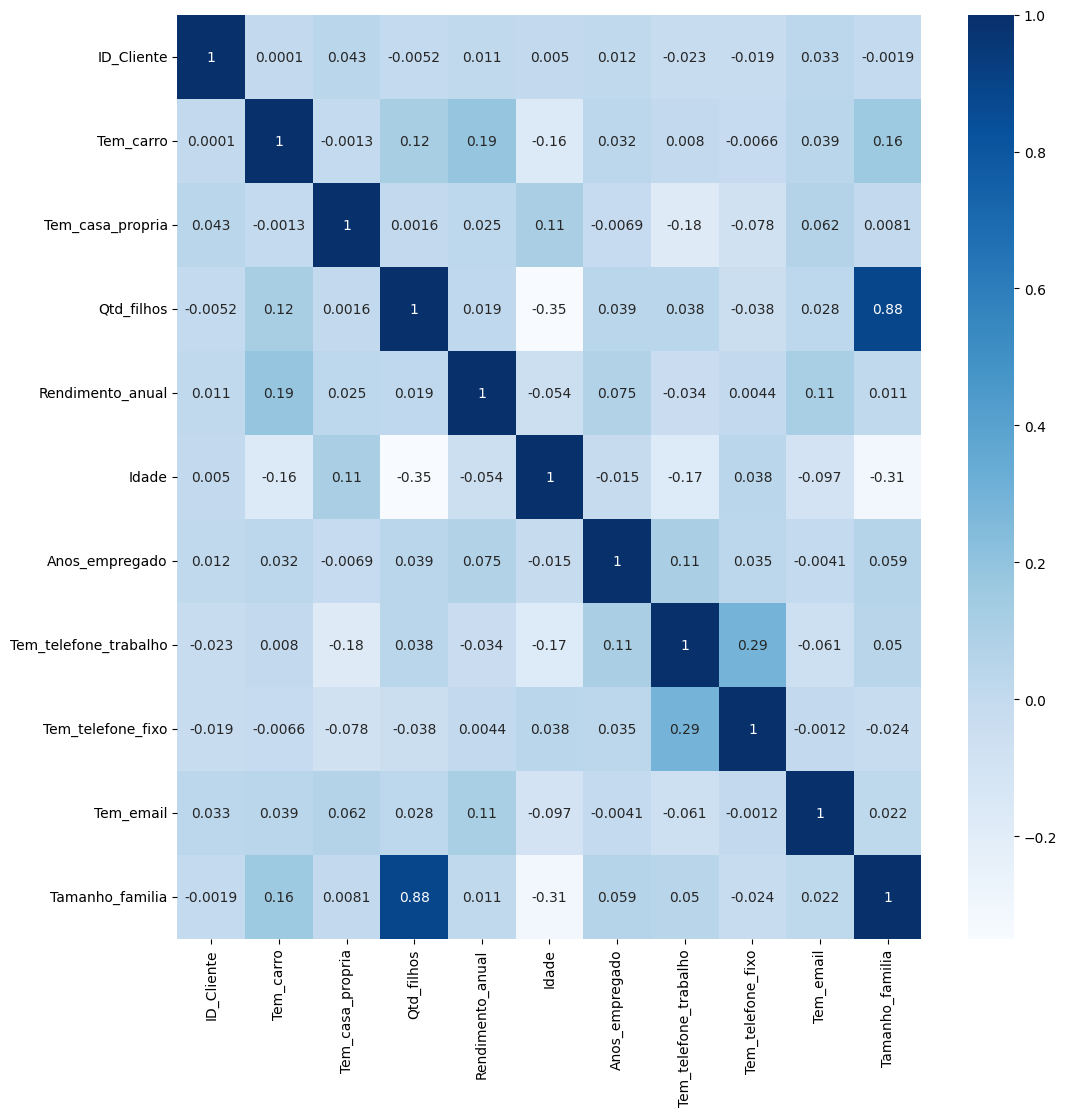

In [30]:
corr = df_cadastrados_limpo.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [31]:
df_cadastrados_limpo.drop(['Qtd_filhos'], axis=1, inplace=True)

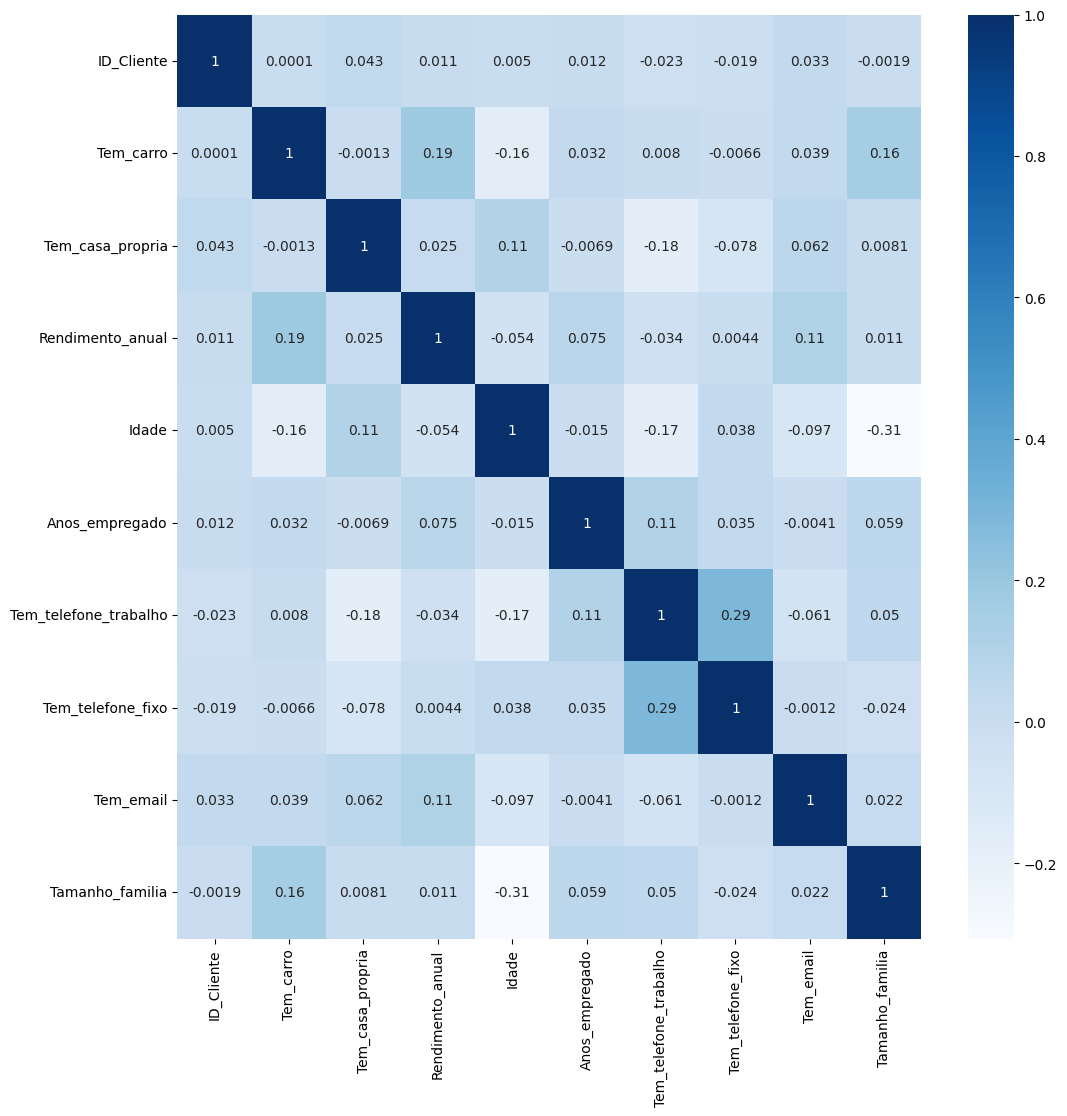

In [32]:
corr = df_cadastrados_limpo.corr(numeric_only=True)
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [33]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Rendimento_anual,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Idade,Anos_empregado,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Ocupacao,Tamanho_familia
0,5008804,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,33.889214,12.821725,1,0,0,Outro,2.0
1,5008805,1,1,427500.0,Empregado,Ensino superior,União-estável,Apartamento alugado,33.889214,12.821725,1,0,0,Outro,2.0
2,5008806,1,1,112500.0,Empregado,Ensino médio,Casado,Casa/apartamento próprio,60.619491,3.201197,0,0,0,Segurança,2.0
3,5008808,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,53.946096,8.612744,0,1,1,Vendas,1.0
4,5008809,0,1,270000.0,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,53.946096,8.612744,0,1,1,Vendas,1.0


In [34]:
df_cadastrados_limpo = df_cadastrados_limpo[['ID_Cliente', 'Tem_carro',
                                             'Tem_casa_propria',
                                             'Tem_telefone_trabalho',
                                             'Tem_telefone_fixo', 'Tem_email',
                                             'Tamanho_familia',
                                             'Rendimento_anual', 'Idade',
                                             'Anos_empregado',
                                             'Categoria_de_renda',
                                             'Grau_escolaridade',
                                             'Estado_civil', 'Moradia',
                                             'Ocupacao']]

In [35]:
df_cadastrados_limpo.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao
0,5008804,1,1,1,0,0,2.0,427500.0,33.889214,12.821725,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
1,5008805,1,1,1,0,0,2.0,427500.0,33.889214,12.821725,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro
2,5008806,1,1,0,0,0,2.0,112500.0,60.619491,3.201197,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança
3,5008808,0,1,0,1,1,1.0,270000.0,53.946096,8.612744,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas
4,5008809,0,1,0,1,1,1.0,270000.0,53.946096,8.612744,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas


In [36]:
df_cadastrados_limpo['Categoria_de_renda'].value_counts(normalize=True)*100

,proportion
Categoria_de_renda,
Empregado,51.557144
Associado comercial,22.972520
Pensionista,17.214223
Servidor público,8.252236
Estudante,0.003877


In [37]:
aprovados = pd.read_csv(f'{data_path}/clientes-aprovados.csv.tar.gz')
aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias
4,5001712,0,pagamento realizado


In [38]:
aprovados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID_Cliente      1048575 non-null  int64 
 1   Mes_referencia  1048575 non-null  int64 
 2   Faixa_atraso    1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [39]:
aprovados.query('ID_Cliente == 5001712')

,ID_Cliente,Mes_referencia,Faixa_atraso
4,5001712,0,pagamento realizado
5,5001712,-1,pagamento realizado
6,5001712,-2,pagamento realizado
7,5001712,-3,pagamento realizado
8,5001712,-4,pagamento realizado
9,5001712,-5,pagamento realizado
10,5001712,-6,pagamento realizado
11,5001712,-7,pagamento realizado
12,5001712,-8,pagamento realizado
13,5001712,-9,1-29 dias


In [40]:
aprovados.query('ID_Cliente == 5001711')

,ID_Cliente,Mes_referencia,Faixa_atraso
0,5001711,0,nenhum empréstimo
1,5001711,-1,1-29 dias
2,5001711,-2,1-29 dias
3,5001711,-3,1-29 dias


In [41]:
aprovados.Faixa_atraso.value_counts()

,count
Faixa_atraso,
pagamento realizado,442031
1-29 dias,383120
nenhum empréstimo,209230
30-59 dias,11090
>150 dias,1693
60-89 dias,868
90-119 dias,320
120-149 dias,223


In [42]:
df_registros_credito_agrupados_id = aprovados.groupby('ID_Cliente')
ser_abertura = df_registros_credito_agrupados_id.apply(lambda x: min(x['Mes_referencia']))
ser_abertura.name = 'Abertura'
ser_abertura

<ipython-input-42-875799af63a3>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ser_abertura = df_registros_credito_agrupados_id.apply(lambda x: min(x['Mes_referencia']))


,Abertura
ID_Cliente,
5001711,-3
5001712,-18
5001713,-21
5001714,-14
5001715,-59
...,...
5150482,-28
5150483,-17
5150484,-12


In [43]:
df_clientes_aprovados = aprovados.merge(ser_abertura, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura
0,5001711,0,nenhum empréstimo,-3
1,5001711,-1,1-29 dias,-3
2,5001711,-2,1-29 dias,-3
3,5001711,-3,1-29 dias,-3
4,5001712,0,pagamento realizado,-18


In [44]:
ser_final = df_registros_credito_agrupados_id.apply(lambda x: max(x['Mes_referencia']))
ser_final.name = 'Final'
ser_final

<ipython-input-44-85aa3994a212>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ser_final = df_registros_credito_agrupados_id.apply(lambda x: max(x['Mes_referencia']))


,Final
ID_Cliente,
5001711,0
5001712,0
5001713,0
5001714,0
5001715,0
...,...
5150482,-11
5150483,0
5150484,0


In [45]:
df_clientes_aprovados = df_clientes_aprovados.merge(ser_final, on='ID_Cliente')
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final
0,5001711,0,nenhum empréstimo,-3,0
1,5001711,-1,1-29 dias,-3,0
2,5001711,-2,1-29 dias,-3,0
3,5001711,-3,1-29 dias,-3,0
4,5001712,0,pagamento realizado,-18,0


In [46]:
df_clientes_aprovados['Janela'] = df_clientes_aprovados['Final'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela
0,5001711,0,nenhum empréstimo,-3,0,3
1,5001711,-1,1-29 dias,-3,0,3
2,5001711,-2,1-29 dias,-3,0,3
3,5001711,-3,1-29 dias,-3,0,3
4,5001712,0,pagamento realizado,-18,0,18


In [47]:
df_clientes_aprovados['MOB']  = df_clientes_aprovados['Mes_referencia'] - df_clientes_aprovados['Abertura']
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB
0,5001711,0,nenhum empréstimo,-3,0,3,3
1,5001711,-1,1-29 dias,-3,0,3,2
2,5001711,-2,1-29 dias,-3,0,3,1
3,5001711,-3,1-29 dias,-3,0,3,0
4,5001712,0,pagamento realizado,-18,0,18,18


In [48]:
df_clientes_aprovados['Faixa_atraso'].unique()

array(['nenhum empréstimo', '1-29 dias', 'pagamento realizado',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [49]:
dict_faixa_atraso_ind = {
    'nenhum empréstimo': 0,
    'pagamento realizado': 1,
    '1-29 dias': 2,
    '30-59 dias': 3,
    '60-89 dias': 4,
    '90-119 dias': 5,
    '120-149 dias': 6,
    '>150 dias': 7
}

In [50]:
df_clientes_aprovados['Ind_Faixa_atraso'] = df_clientes_aprovados['Faixa_atraso'].map(dict_faixa_atraso_ind)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso
0,5001711,0,nenhum empréstimo,-3,0,3,3,0
1,5001711,-1,1-29 dias,-3,0,3,2,2
2,5001711,-2,1-29 dias,-3,0,3,1,2
3,5001711,-3,1-29 dias,-3,0,3,0,2
4,5001712,0,pagamento realizado,-18,0,18,18,1


In [51]:
df_clientes_aprovados['Mau'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] > 3 else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0


In [52]:
df_registros_creditos_ID = df_clientes_aprovados[['ID_Cliente',
                                                  'Abertura',
                                                  'Final',
                                                  'Janela']].groupby('ID_Cliente')\
                                                            .apply(lambda x: x.iloc[0])\
                                                            .reset_index(drop=True)
df_registros_creditos_ID.head()

<ipython-input-52-e01aef2034ce>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.iloc[0])\


,ID_Cliente,Abertura,Final,Janela
0,5001711,-3,0,3
1,5001712,-18,0,18
2,5001713,-21,0,21
3,5001714,-14,0,14
4,5001715,-59,0,59


In [53]:
df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_denominador.columns = ['Abertura', 'Qtd_Clientes']
df_denominador

<ipython-input-53-a1d10c48054f>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_denominador = df_registros_creditos_ID.groupby('Abertura').apply(lambda x: x['ID_Cliente'].count()).reset_index()


,Abertura,Qtd_Clientes
0,-60,415
1,-59,406
2,-58,440
3,-57,400
4,-56,470
...,...,...
56,-4,874
57,-3,919
58,-2,771
59,-1,686


In [54]:
df_vintage = df_clientes_aprovados.groupby(['Abertura', 'MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()
df_vintage.columns = ['Abertura', 'MOB', 'Qtd_Clientes']
df_vintage

<ipython-input-54-84111d5ef0bc>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_vintage = df_clientes_aprovados.groupby(['Abertura', 'MOB']).apply(lambda x: x['ID_Cliente'].count()).reset_index()


,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,414
2,-60,2,410
3,-60,3,408
4,-60,4,403
...,...,...,...
1886,-2,1,770
1887,-2,2,750
1888,-1,0,686
1889,-1,1,682


In [55]:
df_vintage = pd.merge(df_vintage[['Abertura', 'MOB']], df_denominador, on='Abertura', how='left')
df_vintage

,Abertura,MOB,Qtd_Clientes
0,-60,0,415
1,-60,1,415
2,-60,2,415
3,-60,3,415
4,-60,4,415
...,...,...,...
1886,-2,1,771
1887,-2,2,771
1888,-1,0,686
1889,-1,1,686


In [56]:
df_vintage['Qtd_Mau'] = np.nan

for j in range(-60, 1):
  ls = []
  for i in range(0, 61):
    due = list(df_clientes_aprovados.query('Mau == 1 and MOB == @i and Abertura == @j')['ID_Cliente'])
    ls.extend(due)
    df_vintage.loc[(df_vintage['MOB'] == i) & (df_vintage['Abertura'] == j), 'Qtd_Mau'] = len(set(ls))

df_vintage['Taxa_de_Mau'] = df_vintage['Qtd_Mau'] / df_vintage['Qtd_Clientes']
df_vintage

,Abertura,MOB,Qtd_Clientes,Qtd_Mau,Taxa_de_Mau
0,-60,0,415,0.0,0.000000
1,-60,1,415,0.0,0.000000
2,-60,2,415,0.0,0.000000
3,-60,3,415,0.0,0.000000
4,-60,4,415,0.0,0.000000
...,...,...,...,...,...
1886,-2,1,771,0.0,0.000000
1887,-2,2,771,1.0,0.001297
1888,-1,0,686,0.0,0.000000
1889,-1,1,686,0.0,0.000000


In [57]:
df_vintage_pivot = df_vintage.pivot(index='Abertura', columns='MOB', values='Taxa_de_Mau')
df_vintage_pivot

MOB,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
Abertura,,,,,,,,,,,,,,,,,,,,,
-60,0.0,0.0,0.000000,0.000000,0.000000,0.002410,0.002410,0.007229,0.007229,0.009639,...,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.028916,0.031325,0.031325,0.031325
-59,0.0,0.0,0.000000,0.004926,0.004926,0.004926,0.007389,0.007389,0.007389,0.012315,...,0.029557,0.029557,0.029557,0.032020,0.032020,0.032020,0.032020,0.032020,0.032020,NaN
-58,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.004545,0.006818,0.006818,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN
-57,0.0,0.0,0.000000,0.000000,0.002500,0.002500,0.002500,0.007500,0.007500,0.007500,...,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,NaN,NaN,NaN
-56,0.0,0.0,0.004255,0.004255,0.008511,0.010638,0.010638,0.017021,0.017021,0.021277,...,0.036170,0.036170,0.036170,0.036170,0.038298,0.038298,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-4,0.0,0.0,0.000000,0.003432,0.003432,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3,0.0,0.0,0.001088,0.001088,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2,0.0,0.0,0.001297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


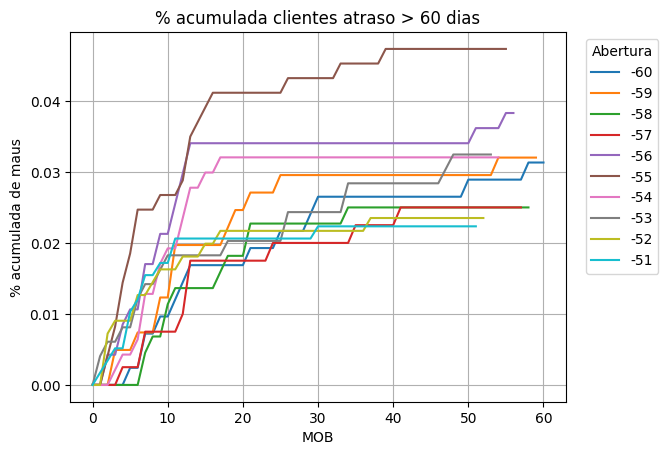

In [61]:
lst = [i for i in range(0, 61)]
df_vintage_pivot[lst].T.iloc[:, :10].plot(legend=True, grid=True,
                                          title='% acumulada clientes atraso > 60 dias')
plt.xlabel('MOB')
plt.ylabel('% acumulada de maus')
plt.legend(bbox_to_anchor=(1.2, 1), title='Abertura')
plt.show()

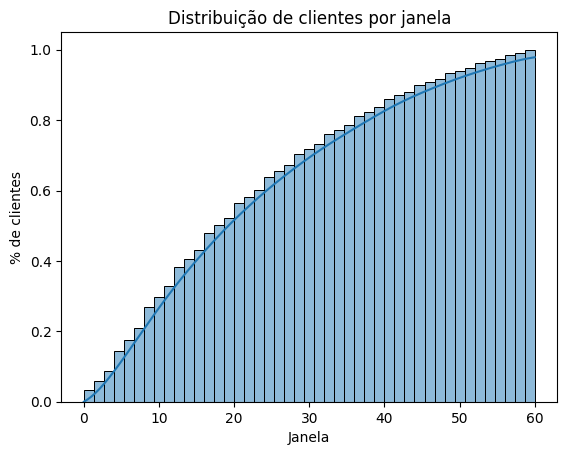

In [62]:
sns.histplot(data=df_registros_creditos_ID, x='Janela', cumulative=True, stat='density', kde=True)
plt.title('Distribuição de clientes por janela')
plt.xlabel('Janela')
plt.ylabel('% de clientes')
plt.show()

In [63]:
dict_intervalo_atraso = {'maior_30_dias': 3, 'maior_60_dias': 4,
                         'maior_90_dias': 5, 'maior_120_dias': 6,
                         'maior_150_dias': 7}

In [64]:
for k, v in dict_intervalo_atraso.items():
  df_clientes_aprovados[f'Mau_{k}'] = df_clientes_aprovados.apply(lambda x: 1 if x['Ind_Faixa_atraso'] >= v else 0, axis=1)
df_clientes_aprovados.head()

,ID_Cliente,Mes_referencia,Faixa_atraso,Abertura,Final,Janela,MOB,Ind_Faixa_atraso,Mau,Mau_maior_30_dias,Mau_maior_60_dias,Mau_maior_90_dias,Mau_maior_120_dias,Mau_maior_150_dias
0,5001711,0,nenhum empréstimo,-3,0,3,3,0,0,0,0,0,0,0
1,5001711,-1,1-29 dias,-3,0,3,2,2,0,0,0,0,0,0
2,5001711,-2,1-29 dias,-3,0,3,1,2,0,0,0,0,0,0
3,5001711,-3,1-29 dias,-3,0,3,0,2,0,0,0,0,0,0
4,5001712,0,pagamento realizado,-18,0,18,18,1,0,0,0,0,0,0


In [65]:
dict_taxa_mau = {}
id_sum = len(set(df_clientes_aprovados['ID_Cliente']))

for chave in dict_intervalo_atraso.keys():
  df_min_mau = df_clientes_aprovados.query(f'Mau_{chave} == 1').groupby('ID_Cliente')['MOB'].min().reset_index()
  df_mob_taxa_mau = pd.DataFrame({'MOB':range(0,61), 'Taxa_Mau': np.nan})
  lst = []
  for i in range(0,61):
      due = df_min_mau.query('MOB == @i')['ID_Cliente'].to_list()
      lst.extend(due) #cumsum
      df_mob_taxa_mau.loc[df_mob_taxa_mau['MOB'] == i, 'Taxa_Mau'] = len(set(lst)) / id_sum
  dict_taxa_mau[chave] = df_mob_taxa_mau['Taxa_Mau']

df_taxa_mau = pd.DataFrame(dict_taxa_mau)
df_taxa_mau

,maior_30_dias,maior_60_dias,maior_90_dias,maior_120_dias,maior_150_dias
0,0.000304,0.000022,0.000022,0.000022,0.000022
1,0.011612,0.000174,0.000087,0.000087,0.000087
2,0.025878,0.001153,0.000196,0.000174,0.000174
3,0.036860,0.002240,0.000696,0.000304,0.000304
4,0.047385,0.003392,0.001044,0.000696,0.000348
...,...,...,...,...,...
56,0.116321,0.014483,0.007176,0.005263,0.004219
57,0.116321,0.014483,0.007176,0.005263,0.004219
58,0.116321,0.014505,0.007198,0.005284,0.004241
59,0.116321,0.014505,0.007198,0.005284,0.004241


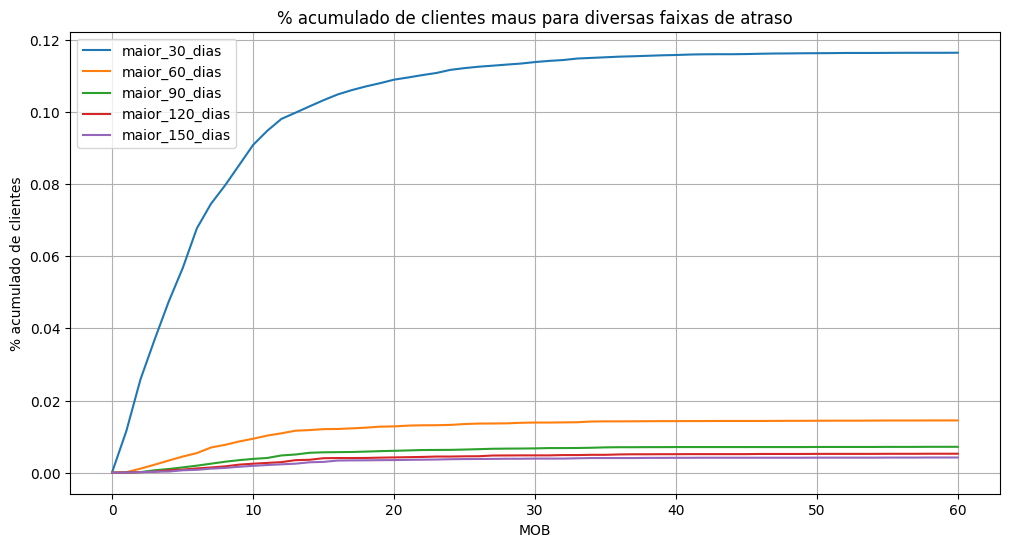

In [66]:
df_taxa_mau.plot(grid = True, title = '% acumulado de clientes maus por faixas de atraso', figsize=(12, 6))
plt.xlabel('MOB')
plt.ylabel('% acumulado de clientes')
plt.show()

In [67]:
df_clientes_aprovados_tratamento = df_clientes_aprovados.query('Janela >= 12')

In [69]:
df_clientes_aprovados_tratamento['Faixa_atraso'].unique()

array(['pagamento realizado', '1-29 dias', 'nenhum empréstimo',
       '30-59 dias', '60-89 dias', '90-119 dias', '120-149 dias',
       '>150 dias'], dtype=object)

In [70]:
def verifica(registros):
  lista_status = registros['Faixa_atraso'].to_list()
  if '60-89 dias' in lista_status \
      or '90-119 dias' in lista_status \
      or '120-149 dias' in lista_status \
      or '>150 dias' in lista_status:
    return 1
  else:
    return 0

In [71]:
df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento.groupby('ID_Cliente').apply(verifica)).reset_index()
df_registros_creditos_id.columns = ['ID_Cliente', 'Mau']
df_registros_creditos_id.head()

<ipython-input-71-f0af346df781>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_registros_creditos_id = pd.DataFrame(df_clientes_aprovados_tratamento.groupby('ID_Cliente').apply(verifica)).reset_index()


,ID_Cliente,Mau
0,5001712,0
1,5001713,0
2,5001714,0
3,5001715,0
4,5001717,0


In [72]:
df_registro_clientes_targets = df_cadastrados_limpo.merge(df_registros_creditos_id, on='ID_Cliente')
df_registro_clientes_targets.head()

,ID_Cliente,Tem_carro,Tem_casa_propria,Tem_telefone_trabalho,Tem_telefone_fixo,Tem_email,Tamanho_familia,Rendimento_anual,Idade,Anos_empregado,Categoria_de_renda,Grau_escolaridade,Estado_civil,Moradia,Ocupacao,Mau
0,5008804,1,1,1,0,0,2.0,427500.0,33.889214,12.821725,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro,0
1,5008805,1,1,1,0,0,2.0,427500.0,33.889214,12.821725,Empregado,Ensino superior,União-estável,Apartamento alugado,Outro,0
2,5008806,1,1,0,0,0,2.0,112500.0,60.619491,3.201197,Empregado,Ensino médio,Casado,Casa/apartamento próprio,Segurança,0
3,5008810,0,1,0,1,1,1.0,270000.0,53.946096,8.612744,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0
4,5008811,0,1,0,1,1,1.0,270000.0,53.946096,8.612744,Associado comercial,Ensino médio,Solteiro,Casa/apartamento próprio,Vendas,0


In [73]:
df_registro_clientes_targets['Mau'].value_counts(normalize=True) * 100

,proportion
Mau,
0,97.71126
1,2.28874
